In [ ]:
from google.colab import drive 
drive.mount('/content/drive') # remove the cell if colab is not used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/Users/fidok/Developer/WakacyjneWyzwanieSOLVRO-ML/ml-wakacyjne-wyzwanie-2025/data') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

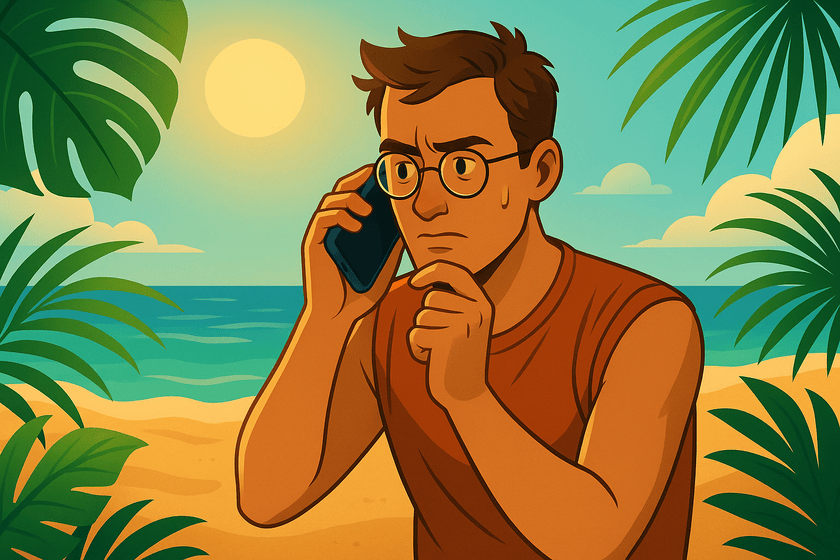

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [3]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# Sprawdzenie danych

In [4]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,793.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,33.123938,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,51.578312,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# Czy wszystkie kolumny są istotne w kontekście zadania?

Nie, kolumny które nie mają wpływu na to czy osoba przeżyła czy też nie to:
- Name
- Ticket

# Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz?

In [6]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64

## Tak występują (Age, Fare, Cabin, Embarked):
- Porzucę kolumny Name i Ticket, ponieważ nie wpływają na przeżywalność
- Kolumnę Age i Fare uśrednię, Fare nie ma raczej aż tak dużego wpływu na przeżywalność
- Kolumnę Cabin porzucę ze względu na zbyt dużą ilość braków 
- W kolumnie Embarked są małe braki dam po prostu Unknown


In [7]:
#usuwanie
titanic_df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [ ]:
#Zastepuje niewiadome średnią z zakresu Age
age_dist = titanic_df['Age'].value_counts(normalize=True)
titanic_df.loc[titanic_df['Age'].isna(), 'Age'] = np.random.choice(age_dist.index, size=titanic_df['Age'].isna().sum(), p=age_dist.values)

In [ ]:
#Zastepuje niewiadome średnią z zakresu Fare
fare_dist = titanic_df['Fare'].value_counts(normalize=True)
titanic_df.loc[titanic_df['Fare'].isna(), 'Fare'] = np.random.choice(fare_dist.index, size=titanic_df['Fare'].isna().sum(), p=fare_dist.values)

In [10]:
#Unknown
titanic_df['Embarked'].fillna('Unknown')

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

# Dodawanie dodatkowych kolumn

In [11]:
titanic_df['FamilySize'] = (titanic_df['SibSp'] + titanic_df['Parch']).astype('int64')
titanic_df['IsAlone'] = ((titanic_df['SibSp'] + titanic_df['Parch'] == 0)).astype('int64')


# Czy typy danych są odpowiednie do znaczenia kolumny?

In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   FamilySize  891 non-null    int64  
 9   IsAlone     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 76.6+ KB


In [13]:
titanic_df.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
IsAlone         int64
dtype: object

### Zakodowanie cech kategorialnych:
- plec jako 1 - mężczyzna 0 - kobieta
- Embarked Jako 0 - Unknown , 1 - S , 2 - C , 3 - Q odpowiednio do miast 


In [14]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0})

In [15]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({'Unknown':0, 'S':1, 'Q':2, 'C':3})

In [16]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1.0,1,0
2,1,1,0,38.0,1,0,71.2833,3.0,1,0
3,1,3,0,26.0,0,0,7.9250,1.0,0,1
4,1,1,0,35.0,1,0,53.1000,1.0,1,0
5,0,3,1,35.0,0,0,8.0500,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,1.0,0,1
888,1,1,0,19.0,0,0,30.0000,1.0,0,1
889,0,3,0,22.0,1,2,23.4500,1.0,3,0


# Outlinery dla Age i Fare

In [17]:
def plot(df, column_name, color):
    plt.figure(figsize=(10, 5))

    #boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name].dropna(), color=color) 
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    #histplot
    plt.subplot(1, 2, 2)
    sns.histplot(x=df[column_name].dropna(), color=color) 
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)
    
    plt.show()

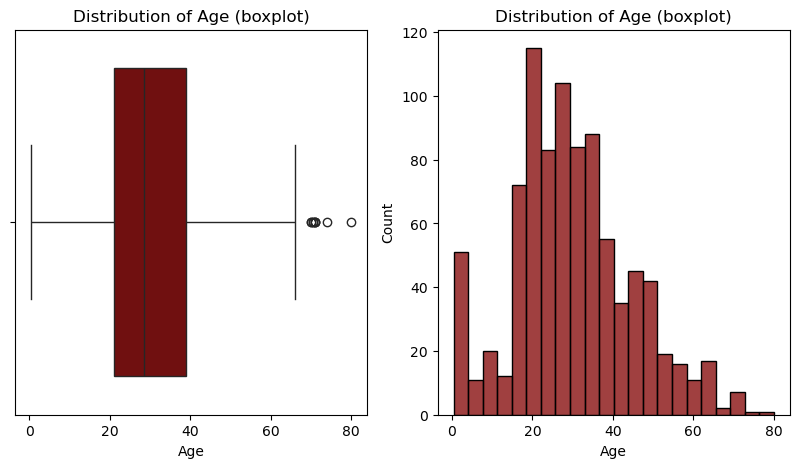

In [18]:
plot(titanic_df, 'Age', 'maroon')

In [19]:
Q1 = titanic_df['Age'].quantile(0.25) # lower quantile
Q3 = titanic_df['Age'].quantile(0.75) # upper quantile
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outlier_age = titanic_df[(titanic_df['Age'] < lower_bound) | (titanic_df['Age'] > upper_bound)]
outlier_age


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,,,,
97,0,1,1,71.0,0,0,34.6542,3.0,0,1
117,0,3,1,70.5,0,0,7.7500,2.0,0,1
236,0,3,0,71.0,0,0,7.5500,1.0,0,1
412,0,3,1,70.5,0,0,6.8583,2.0,0,1
494,0,1,1,71.0,0,0,49.5042,3.0,0,1
631,1,1,1,80.0,0,0,30.0000,1.0,0,1
673,0,2,1,70.0,0,0,10.5000,1.0,0,1
746,0,1,1,70.0,1,1,71.0000,1.0,2,0
852,0,3,1,74.0,0,0,7.7750,1.0,0,1


Rozkład normalny 
</br>
Wyszczególnieni ludzie zaliczają się jako outlinerzy można zminimalizować ich wpływ po przez różne metody
</br>
<font color='red'>Jak ty byś sobie z nimi poradził(a)?</font> 

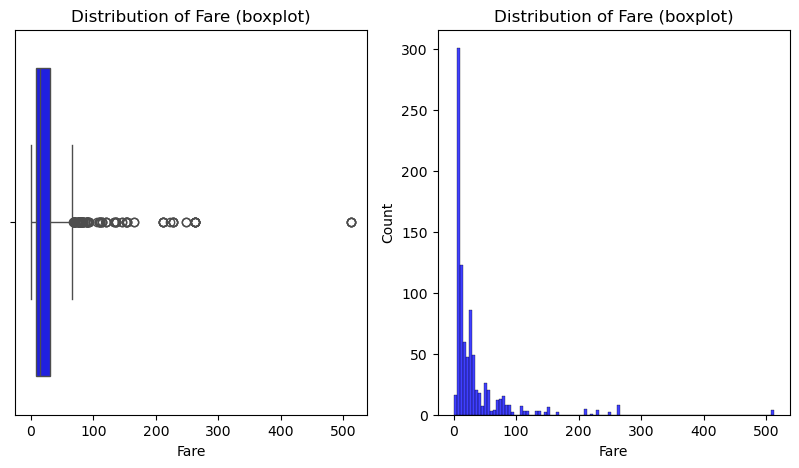

In [20]:
plot(titanic_df, 'Fare', 'blue')

In [21]:
Q1 = titanic_df['Fare'].quantile(0.25) # lower quantile
Q3 = titanic_df['Fare'].quantile(0.75) # upper quantile
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outlier_fare = titanic_df[(titanic_df['Fare'] < lower_bound) | (titanic_df['Fare'] > upper_bound)]
outlier_fare


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,,,,
2,1,1,0,38.0,1,0,71.2833,3.0,1,0
28,0,1,1,19.0,3,2,263.0000,1.0,5,0
32,1,1,0,61.0,1,0,146.5208,3.0,1,0
53,1,1,0,49.0,1,0,76.7292,3.0,1,0
62,1,1,0,38.0,0,0,80.0000,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...
847,0,3,1,24.0,8,2,69.5500,1.0,10,0
850,1,1,0,40.0,1,0,89.1042,3.0,1,0
857,1,1,0,45.0,1,1,164.8667,1.0,2,0


Asymetryczna dystrybucja danych 

# Która zmienna oznacza predykowaną klasę?

Survived

In [40]:
def survival_histogram(df, x_column, survival_column='Survived'):
    plt.figure(figsize=(6, 4))
    
    survived = df[df[survival_column] == 1][x_column]
    died = df[df[survival_column] == 0][x_column]
    
    plt.hist(died, bins=20, alpha=0.7, label='Zmarli', color='red', edgecolor='black')
    plt.hist(survived, bins=20, alpha=0.7, label='Przeżyli', color='green', edgecolor='black')
    
    plt.xlabel(x_column)
    plt.ylabel('Liczba osób')
    plt.legend()
    plt.show()

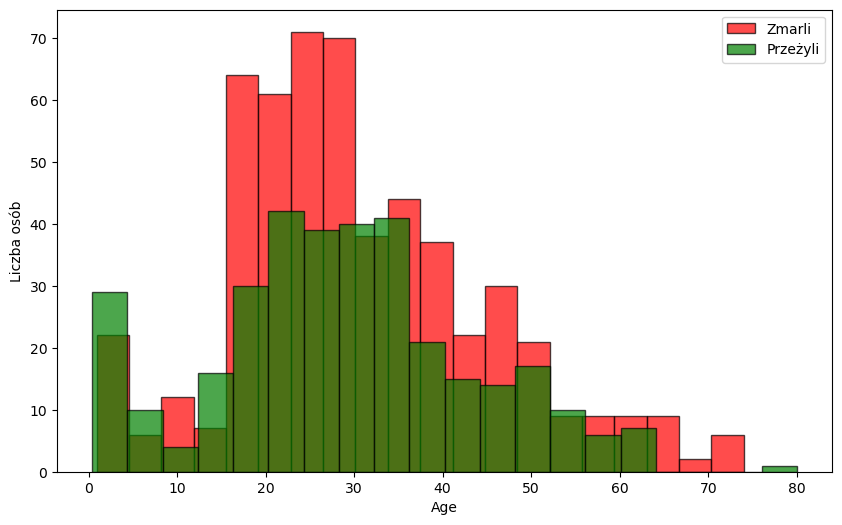

In [39]:
survival_histogram(titanic_df,'Age')

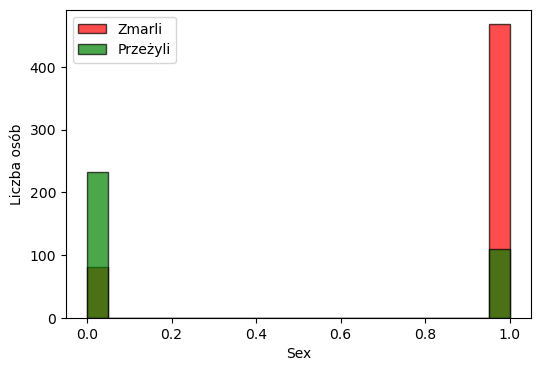

In [41]:
survival_histogram(titanic_df,'Sex')

1 - Mężczyźni <br>
0 - Kobiety

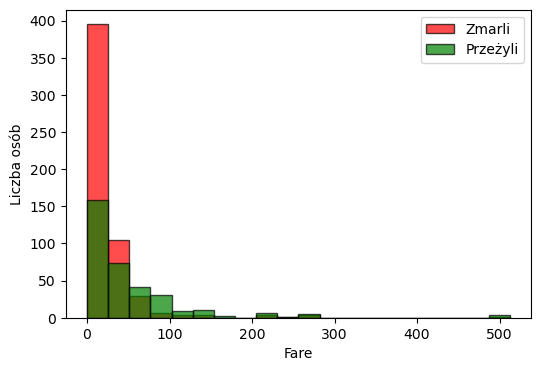

In [43]:
survival_histogram(titanic_df,'Fare')

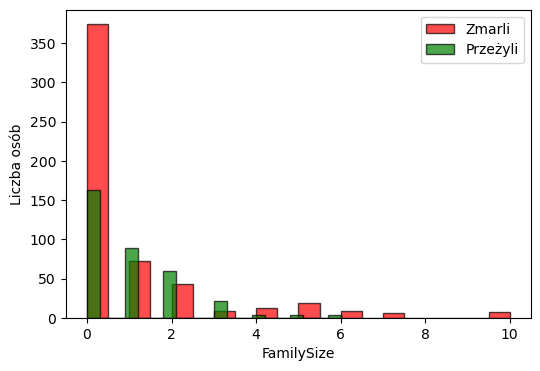

In [44]:
survival_histogram(titanic_df,'FamilySize')

# Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych?

In [57]:
def plot_correlation_matrix(df):
    
    corr = df.corr(numeric_only=True)

    plt.figure(figsize=(8, 7))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

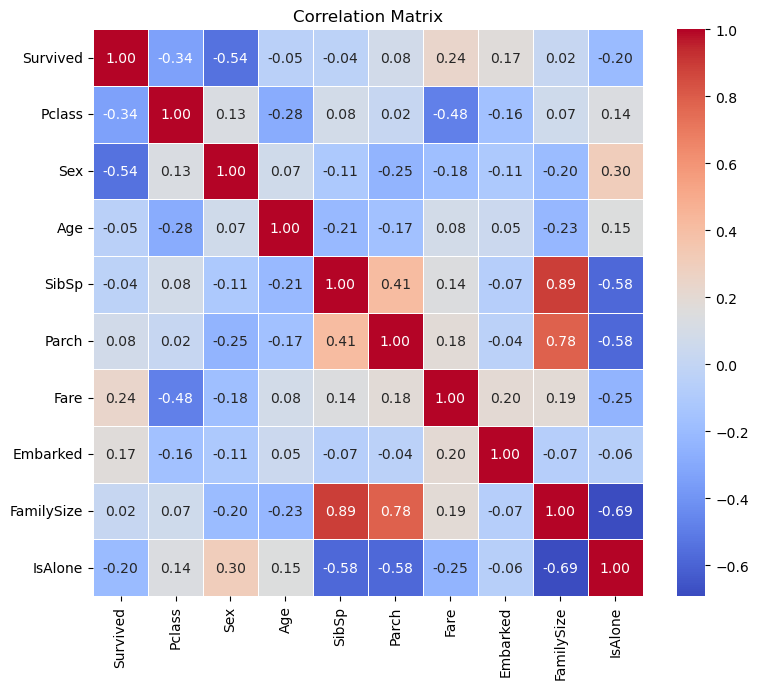

In [58]:
plot_correlation_matrix(titanic_df)

Z wykresu widać że największą korelację z przeżyciem ma Fare i Embarked